In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.00,90.00,1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = zip(lats,lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count.    
print(len(cities), cities[0],cities[1])
print(cities[0].title())

605 barrow mataura
Barrow


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data=[]

#print the beginning of the logging
print("Beginning Data Retrieval")
print("-------------------------")

#create counters
record_ct =1
set_ct =1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_ct+=1 
        record_ct =1
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+") #if the cities has spaces in between like "Los Angeles", this code concatenates them
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
    #Add 1 to the record count
    record_ct += 1
    
# Run an API request for each of the cities.
    try:
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found, skipping...")
        continue
#Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nambucca heads
Processing Record 8 of Set 1 | abu samrah
Processing Record 9 of Set 1 | bertoua
Processing Record 10 of Set 1 | vao
Processing Record 11 of Set 1 | pousat
City not found, skipping...
Processing Record 12 of Set 1 | ossora
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mbuji-mayi
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | taolanaro
City not 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,30.22,93,90,18.41,US,2021-06-07 05:23:38
1,Mataura,-46.1927,168.8643,49.48,87,0,2.73,NZ,2021-06-07 05:22:22
2,Bredasdorp,-34.5322,20.0403,63.72,36,4,8.25,ZA,2021-06-07 05:22:25
3,Brae,60.3964,-1.3530,46.31,75,97,2.33,GB,2021-06-07 05:24:45
4,Mount Gambier,-37.8333,140.7667,64.31,52,99,24.16,AU,2021-06-07 05:23:43
5,Rikitea,-23.1203,-134.9692,76.44,86,100,15.99,PF,2021-06-07 05:21:17
6,Nambucca Heads,-30.6500,153.0000,69.80,59,14,6.73,AU,2021-06-07 05:27:34
7,Abu Samrah,35.3029,37.1841,71.29,35,0,6.35,SY,2021-06-07 05:27:35
8,Bertoua,4.5833,13.6833,66.67,99,95,1.30,CM,2021-06-07 05:27:35
9,Vao,-22.6667,167.4833,69.71,62,28,14.99,NC,2021-06-07 05:23:19


In [8]:
#re-arrange column order
new_column_order = ["City", "Country", "Date","Lat","Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-06-07 05:23:38,71.2906,-156.7887,30.22,93,90,18.41
1,Mataura,NZ,2021-06-07 05:22:22,-46.1927,168.8643,49.48,87,0,2.73
2,Bredasdorp,ZA,2021-06-07 05:22:25,-34.5322,20.0403,63.72,36,4,8.25
3,Brae,GB,2021-06-07 05:24:45,60.3964,-1.3530,46.31,75,97,2.33
4,Mount Gambier,AU,2021-06-07 05:23:43,-37.8333,140.7667,64.31,52,99,24.16
5,Rikitea,PF,2021-06-07 05:21:17,-23.1203,-134.9692,76.44,86,100,15.99
6,Nambucca Heads,AU,2021-06-07 05:27:34,-30.6500,153.0000,69.80,59,14,6.73
7,Abu Samrah,SY,2021-06-07 05:27:35,35.3029,37.1841,71.29,35,0,6.35
8,Bertoua,CM,2021-06-07 05:27:35,4.5833,13.6833,66.67,99,95,1.30
9,Vao,NC,2021-06-07 05:23:19,-22.6667,167.4833,69.71,62,28,14.99


In [9]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today


'06/06/21'

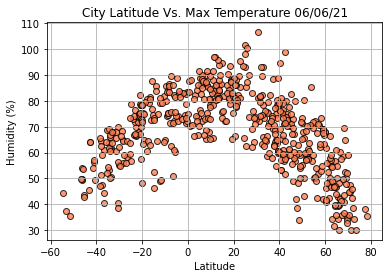

In [12]:
%matplotlib inline

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = 'black',
           color='coral',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.legend = True
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig1.png")
plt.show()

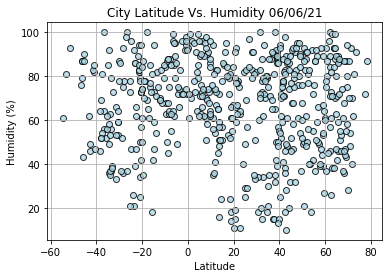

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           color='lightblue',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig2.png")
plt.show()

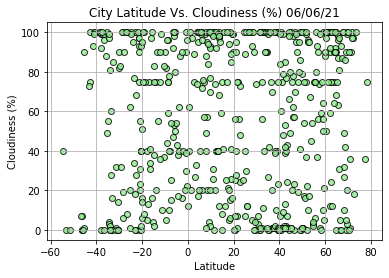

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           color='lightgreen',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig3.png")
plt.show()

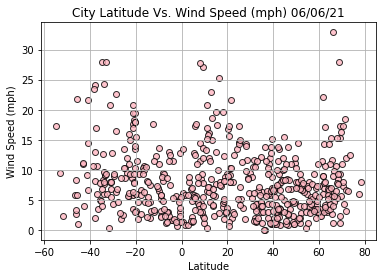

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           color='lightpink',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Wind Speed (mph) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig4.png")
plt.show()